In [1]:
from image_helpers import *
from global_vars import *
import matplotlib.pyplot as plt

In [2]:
data_dir = 'training/'
train_data_filename = data_dir + 'images/'
label_data_filename = data_dir + 'groundtruth/'

# Extract it into numpy arrays.
FILE_REGEX = "satImage_%.3d"

In [3]:
sat_images, label_images = read_images(train_data_filename, label_data_filename, 20, FILE_REGEX)
print("hello")

Loading training/images/satImage_001.png
Loading training/images/satImage_002.png
Loading training/images/satImage_003.png
Loading training/images/satImage_004.png
Loading training/images/satImage_005.png
Loading training/images/satImage_006.png
Loading training/images/satImage_007.png
Loading training/images/satImage_008.png
Loading training/images/satImage_009.png
Loading training/images/satImage_010.png


Loading training/images/satImage_011.png
Loading training/images/satImage_012.png
Loading training/images/satImage_013.png
Loading training/images/satImage_014.png
Loading training/images/satImage_015.png
Loading training/images/satImage_016.png
Loading training/images/satImage_017.png
Loading training/images/satImage_018.png
Loading training/images/satImage_019.png
Loading training/images/satImage_020.png


Loading training/groundtruth/satImage_001.png
Loading training/groundtruth/satImage_002.png
Loading training/groundtruth/satImage_003.png
Loading training/groundtruth/satImage_004.png
Loading training/groundtruth/satImage_005.png
Loading training/groundtruth/satImage_006.png
Loading training/groundtruth/satImage_007.png
Loading training/groundtruth/satImage_008.png
Loading training/groundtruth/satImage_009.png
Loading training/groundtruth/satImage_010.png
Loading training/groundtruth/satImage_011.png
Loading training/groundtruth/satImage_012.png
Loading training/groundtruth/satImage_013.png
Loading training/groundtruth/satImage_014.png
Loading training/groundtruth/satImage_015.png
Loading training/groundtruth/satImage_016.png
Loading training/groundtruth/satImage_017.png
Loading training/groundtruth/satImage_018.png
Loading training/groundtruth/satImage_019.png
Loading training/groundtruth/satImage_020.png
hello


In [4]:
plt.imshow(label_images[1])
print(label_images.shape)
plt.show()

(20, 400, 400)


In [5]:
hello = extract_labels([label_images[0]], IMG_PATCH_SIZE)

hello = label_to_img(50,50, 2,2, hello)
hello = img_float_to_uint8(hello)
Image.fromarray(hello).save("tnp_prediction_2" + ".png")

In [6]:
from mask_to_submission import mask_to_submission_strings

In [16]:
one = list(mask_to_submission_strings("tnp_prediction_1.png", tmp=16))
two = list(mask_to_submission_strings("tnp_prediction_2.png", tmp=2))

print(len(one))
print(len(two))
for i in range(400):
    print(str(one[i]) + '  :  ' + str(two[i]))

625
625
001_0_0,0  :  002_0_0,0
001_0_16,0  :  002_0_2,0
001_0_32,0  :  002_0_4,0
001_0_48,0  :  002_0_6,0
001_0_64,0  :  002_0_8,0
001_0_80,0  :  002_0_10,0
001_0_96,0  :  002_0_12,0
001_0_112,0  :  002_0_14,0
001_0_128,0  :  002_0_16,0
001_0_144,0  :  002_0_18,0
001_0_160,0  :  002_0_20,0
001_0_176,0  :  002_0_22,0
001_0_192,1  :  002_0_24,1
001_0_208,1  :  002_0_26,1
001_0_224,0  :  002_0_28,0
001_0_240,0  :  002_0_30,0
001_0_256,0  :  002_0_32,0
001_0_272,0  :  002_0_34,0
001_0_288,0  :  002_0_36,0
001_0_304,0  :  002_0_38,0
001_0_320,0  :  002_0_40,0
001_0_336,0  :  002_0_42,0
001_0_352,0  :  002_0_44,0
001_0_368,0  :  002_0_46,0
001_0_384,0  :  002_0_48,0
001_16_0,0  :  002_2_0,0
001_16_16,0  :  002_2_2,0
001_16_32,0  :  002_2_4,0
001_16_48,0  :  002_2_6,0
001_16_64,0  :  002_2_8,0
001_16_80,0  :  002_2_10,0
001_16_96,0  :  002_2_12,0
001_16_112,0  :  002_2_14,0
001_16_128,0  :  002_2_16,0
001_16_144,0  :  002_2_18,0
001_16_160,0  :  002_2_20,0
001_16_176,0  :  002_2_22,0
001_16_

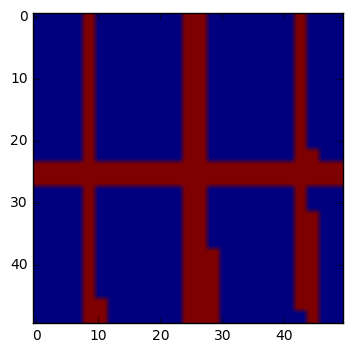

In [28]:
plt.imshow(ndimage.zoom(hello, 2, order=0))
plt.show()

NameError: name 'train_labels' is not defined

In [7]:
patches_train_data = extract_data(train_data, border=IMG_BORDER)
patches_train_labels = extract_labels(train_labels)

patches_validation_data = extract_data(validation_data, border=IMG_BORDER)
patches_validation_labels = extract_labels(validation_labels)

patches_test_data = extract_data(test_data, border=IMG_BORDER)
patches_test_labels = extract_labels(test_labels)

In [8]:
print(patches_train_data.shape)
print(patches_train_labels.shape)
#plt.imshow(train_labels[0])
#plt.show()

(8750, 24, 24, 3)
(8750, 2)


In [15]:
idx0 = [i for i, j in enumerate(patches_train_labels) if j[0] == 1]
print(patches_train_labels[12])

[ 1.  0.]


In [21]:
c0 = 0
c1 = 0
for i in range(len(patches_train_labels)):
    if patches_train_labels[i][0] == 1:
        c0 = c0 + 1
    else:
        c1 = c1 + 1

# Make populations even.
min_c = min(c0, c1)
idx0 = [i for i, j in enumerate(patches_train_labels) if j[0] == 1]
idx1 = [i for i, j in enumerate(patches_train_labels) if j[1] == 1]
new_indices = idx0[0:min_c] + idx1[0:min_c]
tmp_data = patches_train_data[new_indices, :, :, :]
tmp_labels = patches_train_labels[new_indices, :]

In [23]:
tmp_labels.shape

(4040, 2)

In [39]:
patches_train_data, patches_train_labels = balance_data(patches_train_data, patches_train_labels)
patches_validation_data, vpatches_alidation_labels = balance_data(patches_validation_data, patches_validation_labels)
patches_test_data, patches_test_labels = balance_data(patches_test_data, patches_test_labels)

4344
(8750, 24, 24, 3)
1168
(2500, 24, 24, 3)
588
(1250, 24, 24, 3)
